In [114]:
from PIL import Image
from pylab import *
import os
import pickle

# PIL

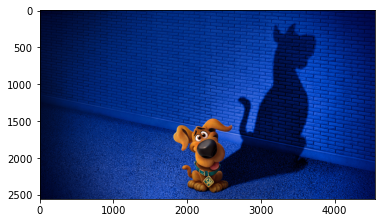

In [53]:
pil_im = Image.open('./img/000.jpg')
imshow(pil_im)

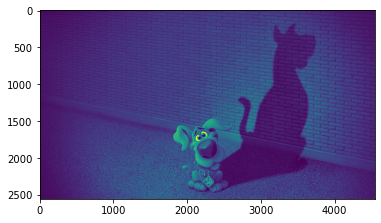

In [54]:
pil_im_l = Image.open('./img/000.jpg').convert('L') # 转为灰度图像
imshow(pil_im_l)

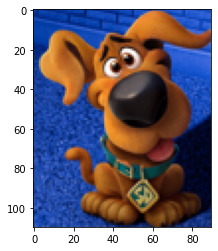

In [73]:
pil_im.thumbnail((1280,280))# 边长为128*128的缩略图

box = (195,160,285,270)     # (左，上，右，下)
region = pil_im.crop(box)   # 裁剪
imshow(region)

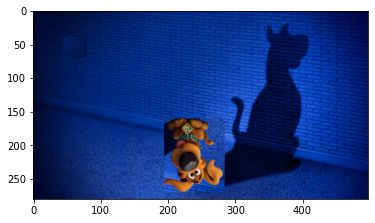

In [74]:
region = region.transpose(Image.ROTATE_180)# 旋转
pil_im.paste(region,box)                   # 放回去
imshow(pil_im)

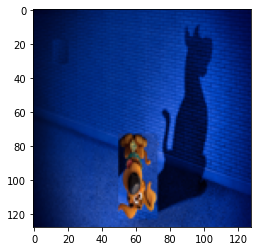

In [75]:
out = pil_im.resize((128,128))
imshow(out)

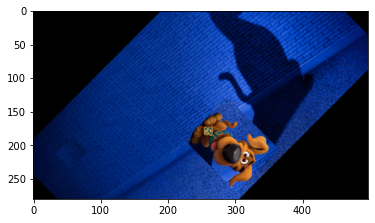

In [76]:
out = pil_im.rotate(45)
imshow(out)

# Matplotlib

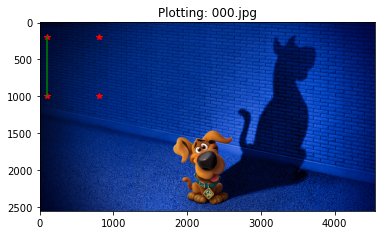

In [84]:
from PIL import Image
from pylab import *
import os

im = array(Image.open('./img/000.jpg'))
imshow(im)
x = [100,100,800,800]
y = [200,1000,200,1000]

plot(x,y,'r*')
plot(x[:2],y[:2],'g')
title('Plotting: 000.jpg')
# axis('off')
show()

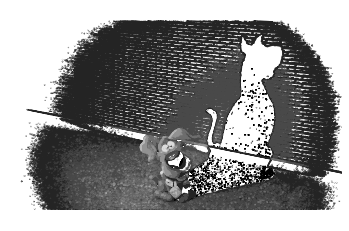

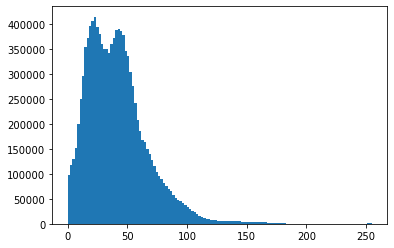

In [90]:
im = array(Image.open('./img/000.jpg').convert('L'))
# 新建一个图像
figure()
# 不使用颜色信息
gray()
# 在原点左上角显示轮廓图像
contour(im,origin='image')
axis('equal')
axis('off')

# 绘制灰度直方图
figure()
hist(im.flatten(),128)
show()

Please click 3 points


D:\A\Python\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


you clicked: []


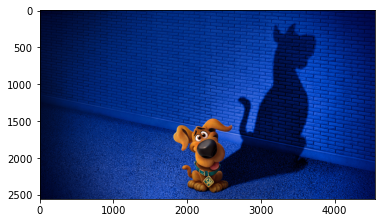

In [92]:
im = array(Image.open('./img/000.jpg'))
imshow(im)
print('Please click 3 points')
x = ginput(3)
print('you clicked:',x)
show()

# Numpy

In [98]:
im = array(Image.open('./img/000.jpg'))
print(im.shape,im.dtype)

im = array(Image.open('./img/000.jpg').convert('L'),'f')
print(im.shape,im.dtype)
print(int(im.min()),int(im.max()))

(2555, 4542, 3) uint8
(2555, 4542) float32
0 255


灰度变换

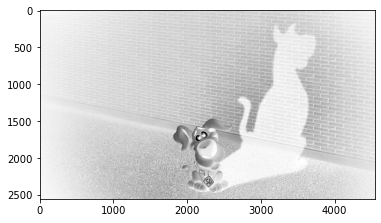

In [95]:
im = array(Image.open('./img/000.jpg').convert('L'),'f')
im2 = 255 - im
imshow(im2)

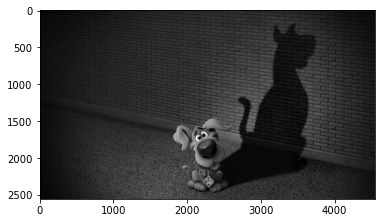

In [96]:
im3 = (100.0/255)*im+100
imshow(im3)

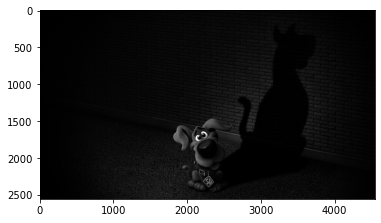

In [97]:
im4 = 255.0*(im/255.0)**2
imshow(im4)

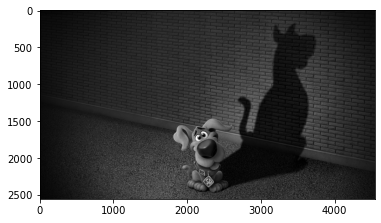

In [99]:
pil_im = Image.fromarray(im)
imshow(pil_im)

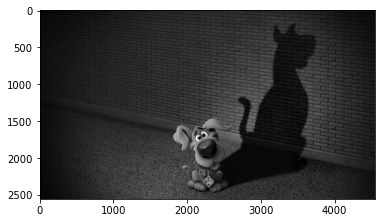

In [101]:
pil_im = Image.fromarray(uint8(im))
imshow(pil_im)

图像缩放

In [102]:
def imresize(im,sz):
    pil_im = mage.fromarray(uint8(im))
    return array(pil_im.resize(sz))

灰度直方图均衡化

In [105]:
def histeq(im,nbr_bins=256):
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # 累积分布函数
    cdf = 255*cdf/cdf[-1] # 归一化
    # 用累积分布函数的线性插值，计算新的像素值
    im2 = interp(im.flatten(),bins[:-1],cdf)
    
    return im2.reshape(im.shape),cdf

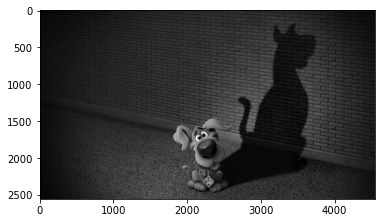

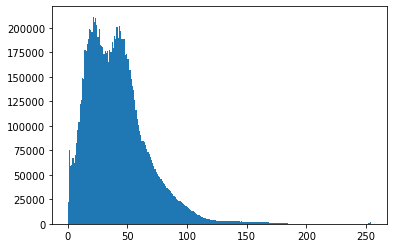

In [111]:
im = array(Image.open('./img/000.jpg').convert('L'))
imshow(im)
figure()
hist(im.flatten(),256)
show()

D:\A\Python\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


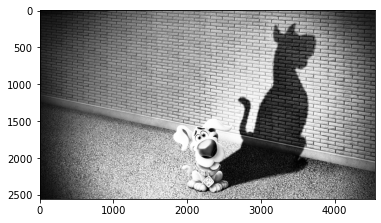

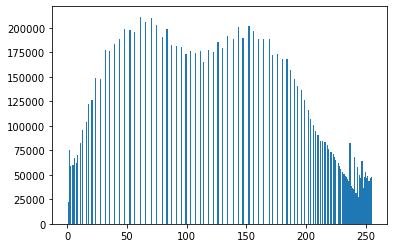

In [112]:
im,cdf = histeq(im)
imshow(im)
figure()
hist(im.flatten(),256)
show()

图像平均

In [113]:
def compute_average(imlist):
    averageim = array(Image.open(imlist[0]),'f')
    
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print(imname+'...skipped')
    averageim /= len(imlist)
    
    return array(averageim,'uint8')

主成分分析（PCA）

pickle模块

In [115]:
# f = open('./xxx.pkl','wb')
# pickle.dump(immean,f)
# pickle.dump(V,f)
# f.close()

# f = open('./xxx.pkl','rb')
# immean = pickle.load(f)
# V = pickle.load(f)
# f.close()

In [116]:
# with open('./xxx.pkl','wb') as f:
#     pickle.dump(immean,f)
#     pickle.dump(V,f)
    
# with open('./xxx.pkl','rb') as f:
#     immean = pickle.load(f)
#     V = pickle.load(f)

# Scipy

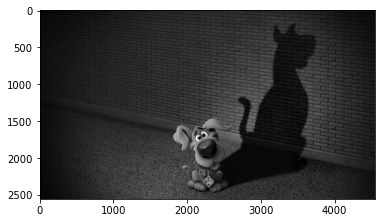

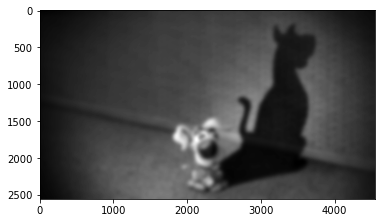

In [119]:
from scipy.ndimage import filters

im = array(Image.open('./img/000.jpg').convert('L'))
im2 = filters.gaussian_filter(im,25) # 高斯模糊，5是标准差
imshow(im)
figure()
imshow(im2)

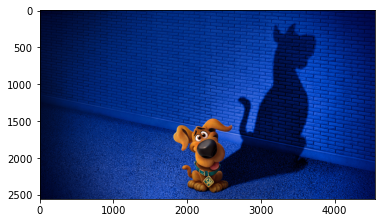

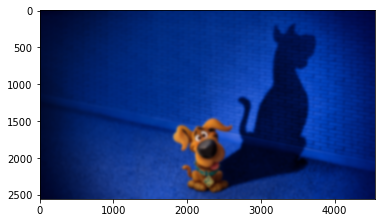

In [124]:
im = array(Image.open('./img/000.jpg'))
im2 = zeros(im.shape)
for i in range(3):
    im2[:,:,i] = filters.gaussian_filter(im[:,:,i],15) # 模糊彩色图像，5是标准差
im2 = uint8(im2)# im2 = array(im2,'uint8')
imshow(im)
figure()
imshow(im2)